# Assignment one 
This notebook is about the first assignment of Embedded Vision. The assignment involves selecting an image with low contrast and conducting a histogram and cumulative distribution function (CDF) analysis. Subsequently, histogram equalization for the color image is to be executed, followed by an explanation of the results.  
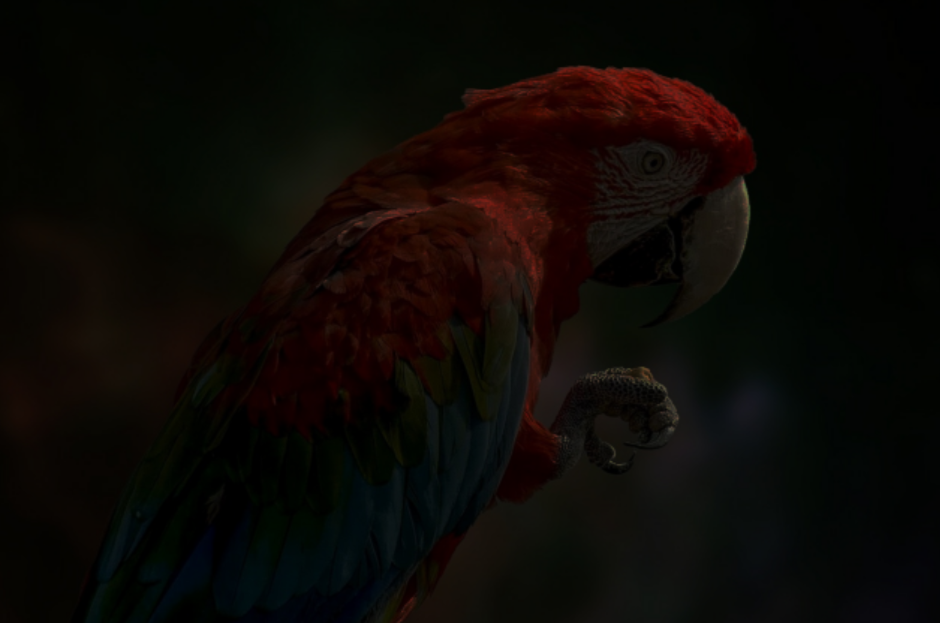

## Prerequisite


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading the image
The image is loaded by using the OpenCV library. Because OpenCV loads the image in a Blue-Green-Red order the order is swapped with the cvtColor()  function. This function takes two parameters: the image itself and the color space conversion code.

In [4]:
# Retrieve the file path of the image
file_path = os.path.join(os.getcwd(), 'parrot_dark.PNG')
print(f"Loading image from: {file_path}")

# Load the image with cv and convert to RGB color space
original_image = cv.imread(file_path)
cv.imshow('Image', original_image)
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)




Loading image from: c:\Users\laris\OneDrive\Bureaublad\vision-2024\Assignment_One\parrot_dark.PNG


## Histogram
A histogram of an image shows the frequency of each data point or group. The horizontal axis represents the range of values or intervals of the data and the vertical axis shows the frequency or count of occurrences for each interval.

### Calculating the histogram
The histogram of the image can be calculated with the function calcHist() from the OpenCV library. The function takes as parameters: the input image, the channel, optional mask, number of bins and the range of pixel values. 

In [5]:
def calculate_hist(image):
    return [
        cv.calcHist([image[:, :, 0]], [0], None, [256], [0, 256]),
        cv.calcHist([image[:, :, 1]], [0], None, [256], [0, 256]),
        cv.calcHist([image[:, :, 2]], [0], None, [256], [0, 256]),
    ]

## CDF
Cumulative Distribution Function (CDF) is used to map cumulative probability for the pixel intensity values. It shows the probability that a pixel intensity value in an image is less than or equal to a particular value. The CDF of a color channel can be calculated by first calculating the cumulative sum of the histogram and then normalize the result.

In [6]:
def calculate_cdf(hist):
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    return cdf_normalized

def calculate_cdf_channels(hist):
    return [
        calculate_cdf(hist[0]),
        calculate_cdf(hist[1]),
        calculate_cdf(hist[2])
    ]

### Plot the histogram and cdf
The following code shows the histogram of the separate color channels of the image. All the histograms are skewed towards the left which indicates that the image is dark with low-intensity values across all the channels. It also shows a narrow spread which suggest that the image is poor in contrast. Because the colors are skewed towards one end the colors are over or under saturated. The histograms also show the color balance and if a color dominates in this case the blue color channel has a much higher peak suggesting there is a dominance of dark pixels in the blue channel. The CDF of the color channels all start very steep and climb very quickly suggesting that there is a high frequency of pixels with low intensities and then it almost levels off indicating that there are almost no pixels with medium to high intensities. This suggest that the image is very dark. 

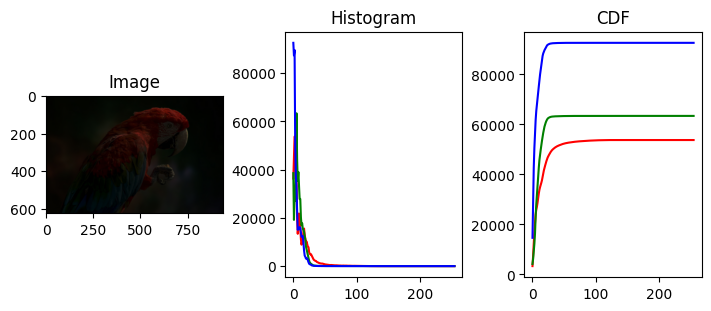

In [7]:
def plot_img_hist_cdf(image, hist, cdf):
    fig, axes = plt.subplots(1, 3, figsize=(7, 3), layout="constrained")

    # Plot the image
    axes[0].set(title="Image")
    axes[0].imshow(image)

    # Plot the histogram of the image
    axes[1].set(title="Histogram")
    axes[1].plot(hist[0], color='r')
    axes[1].plot(hist[1], color='g')
    axes[1].plot(hist[2], color='b')

    # Plot the CDF of the image
    axes[2].set(title="CDF")
    axes[2].plot(cdf[0], color='r')
    axes[2].plot(cdf[1], color='g')
    axes[2].plot(cdf[2], color='b')

    plt.show()


# Calculate the histogram of the color channels of the image and the CDF
hist_image = calculate_hist(original_image)
cdf_image = calculate_cdf_channels(hist_image)

# Plot the image, histograms and cdfs of the image
plot_img_hist_cdf(original_image, hist_image, cdf_image)

## Histogram equalization
Histogram equalization is a technique that is used to improve the contrast in images by modifying the intensity distribution of the histogram. 

### Calculating the histogram equalization
The histogram equalization can be calculated with the function equalizeHist() from the OpenCV library. The goal of the histogram equalization is to improve the contrast of the image. The histogram equalization should not be performed on the seperate color levels because it can alter the colors. Because of this the image is converted to the Hue, Saturation, Value (HSV) color space and the histogram equalization is performed on the value channel. This way the histogram equalization will only effect the brightness and contrast of the image and keep the colors of the image intact. Code \ref{code:calchisteq} shows how to convert the image to the HSV color space and perform the histogram equalization and convert the image back to the RGB color space.        

In [8]:
# Transform the image to the HSV color space
hsv_image = cv.cvtColor(original_image, cv.COLOR_RGB2HSV)
# Equalize the histogram of the Value
hsv_image[:, :, 2] = cv.equalizeHist(hsv_image[:, :, 2])
# Return to the RGB color space
equalized_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

### Plot the histogram and cdf
The new histogram and CDF show that the pixel intensity is more spread out and that the CDF line is more smooth and gradual. 

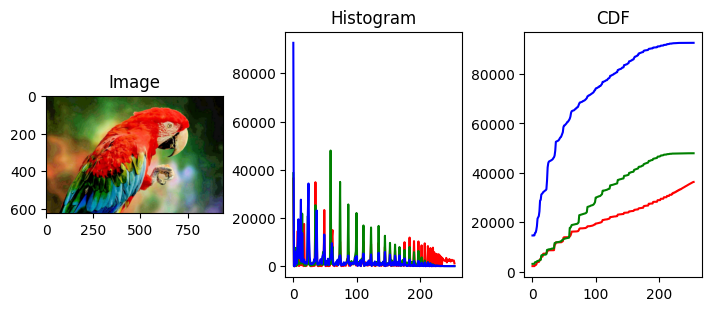

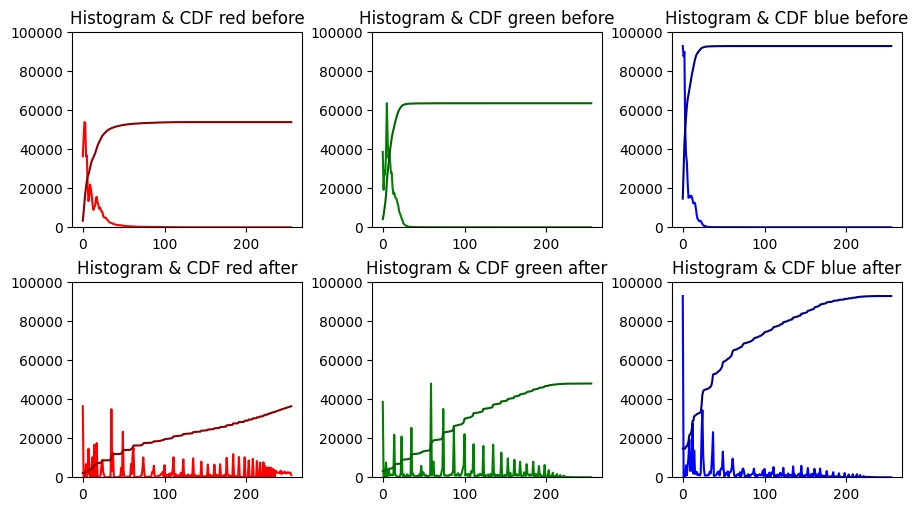

In [9]:
def plot_before_after_hist_cdf(hist_before, hist_after, cdf_before, cdf_after):
    fig, axes = plt.subplots(2, 3, figsize=(9, 5), layout="constrained")
    axes[0, 0].set(title="Histogram & CDF red before")
    axes[0, 0].plot(hist_before[0], color='r')
    axes[0, 0].plot(cdf_before[0], color='#8B0000')
    axes[0, 0].set_ylim([0, 100000])

    axes[0, 1].set(title="Histogram & CDF green before")
    axes[0, 1].plot(hist_before[1], color='g')
    axes[0, 1].plot(cdf_before[1], color='#006400')
    axes[0, 1].set_ylim([0, 100000])

    axes[0, 2].set(title="Histogram & CDF blue before")
    axes[0, 2].plot(hist_before[2], color='b')
    axes[0, 2].plot(cdf_before[2], color='#00008B')
    axes[0, 2].set_ylim([0, 100000])

    axes[1, 0].set(title="Histogram & CDF red after")
    axes[1, 0].plot(hist_after[0], color='r')
    axes[1, 0].plot(cdf_after[0], color='#8B0000')
    axes[1, 0].set_ylim([0, 100000])

    axes[1, 1].set(title="Histogram & CDF green after")
    axes[1, 1].plot(hist_after[1], color='g')
    axes[1, 1].plot(cdf_after[1], color='#006400')
    axes[1, 1].set_ylim([0, 100000])

    axes[1, 2].set(title="Histogram & CDF blue after")
    axes[1, 2].plot(hist_after[2], color='b')
    axes[1, 2].plot(cdf_after[2], color='#00008B')
    axes[1, 2].set_ylim([0, 100000])
    plt.show()

# Calculate the histogram of the color channels of the image and the CDF
hist_image_equalized = calculate_hist(equalized_image)
cdf_image_equalized = calculate_cdf_channels(hist_image_equalized)

# Plot the image, histograms and cdfs of the image
plot_img_hist_cdf(equalized_image, hist_image_equalized, cdf_image_equalized)

# Plot the image, histograms and cdfs of the image
plot_before_after_hist_cdf(hist_image, hist_image_equalized, cdf_image, cdf_image_equalized)

## Result
The following image is the result of the histogram equalization. It shows that the brightness and contrast of the image is improved while the colors are not altered. 

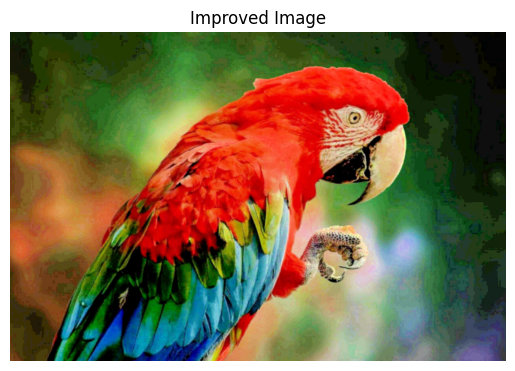

In [10]:
plt.imshow(equalized_image)
plt.title('Improved Image')
plt.axis('off') 
plt.show()